# Assingmet Details: Explore various ways of handling Imbalanced Data


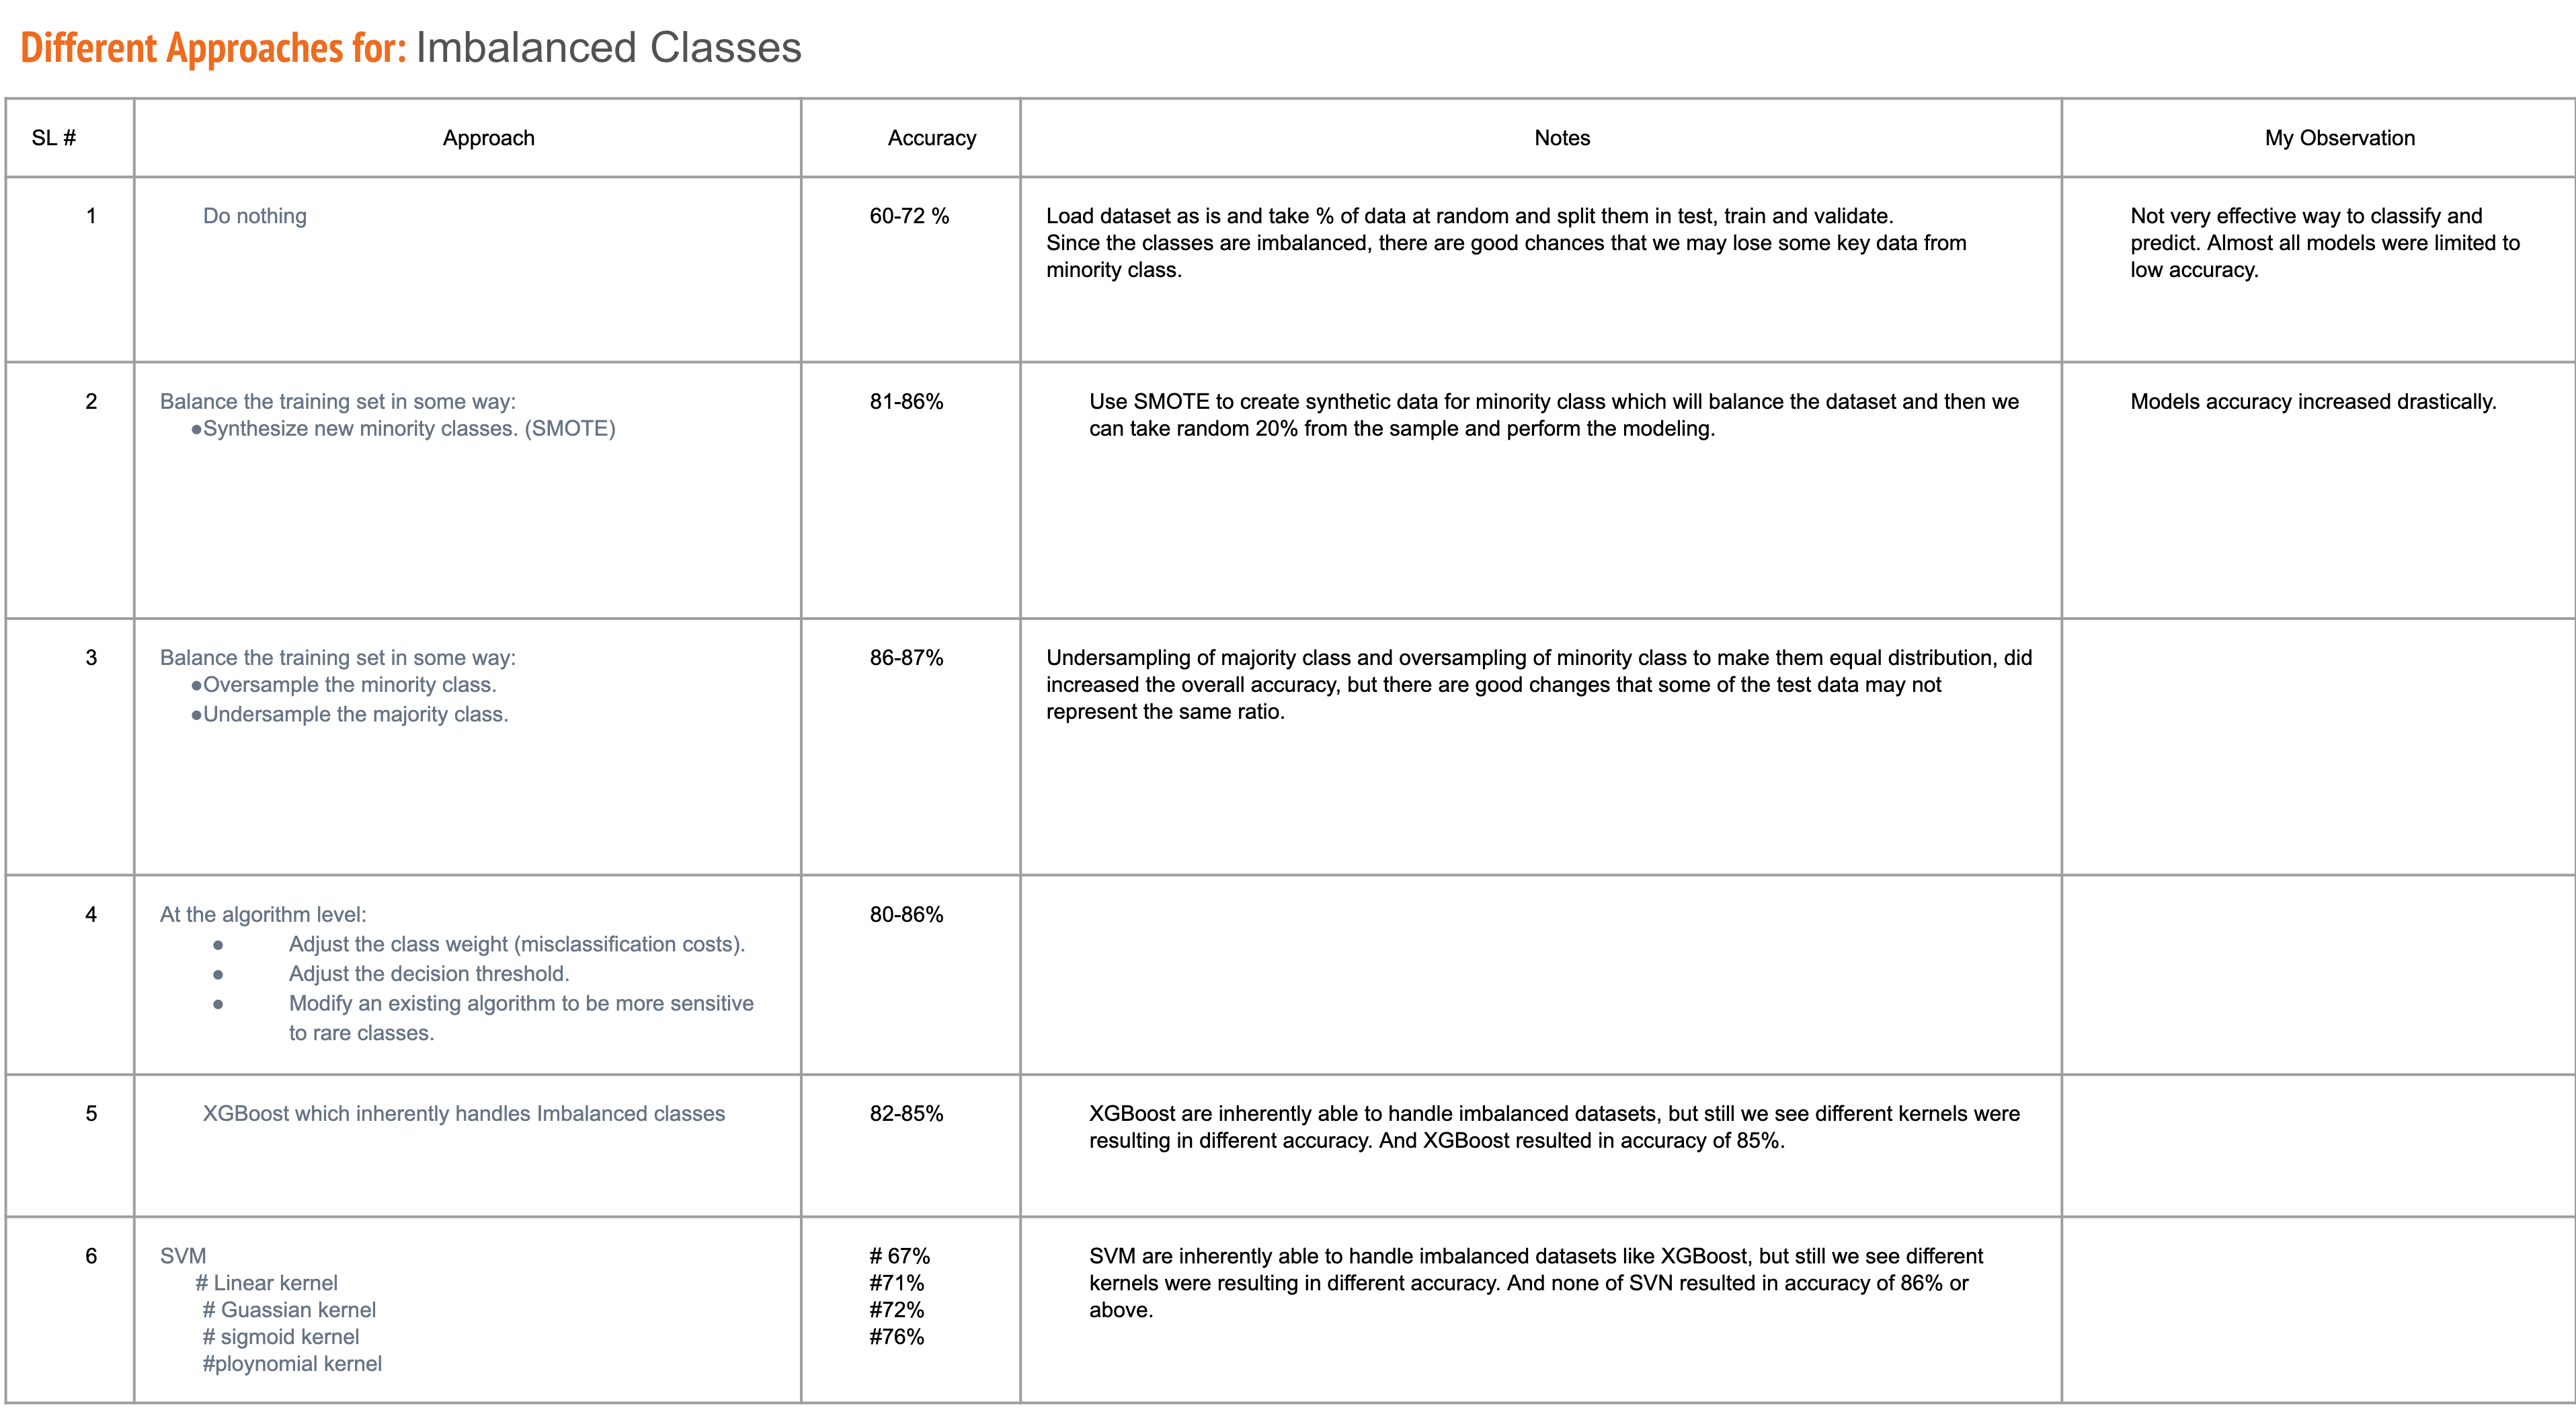

In [1]:
from IPython.display import Image
Image("Dataset.png")

Import the Liraries and files. I am going to do analysis with fllowing three files:- 

1) Title.ratings.tsv
2) Title.basics.tsv
3) Title.crew.tsv
Goal is to do multi class classifiction for movies.

Assingment Details: 
The IMDB Dataset
Source: ​https://www.imdb.com/interfaces/
title.ratings.tsv.gz​ contains title id to rating mapping. However, the features are structured and not flattened in a vectorized form.
Part 1: Data Set Generation 15%
Join ​two ​other sources (e.g. title.crew.tsv.gz, title.basics.tsv.gz, etc) to make some meaningful features for rating prediction.
Part 2: Modeling 15%
Train/Dev/Test random split = 80/10/10
Model the problem as 3-class multiclass classification - split points are 3.3 and 6.6. The grade is given based on the accuracy:


| Accuracy | Points   |
|----------|----------|
|   >70%   | 10 Points|
|   >80%   | 11 Points|
|   >85%   | 12 Points|
|   >90%   | 13 Points|
|   >95%   | 14 Points|

IMDb Dataset Details

Each dataset is contained in a gzipped, tab-separated-values (TSV) formatted file in the UTF-8 character set. The first line in each file contains headers that describe what is in each column. A ‘\N’ is used to denote that a particular field is missing or null for that title/name. The available datasets are as follows:

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
title_ratings =  pd.read_csv("https://datasets.imdbws.com/title.ratings.tsv.gz", delimiter='\t', date_parser = 'python', keep_default_na = True, na_values = ['\\N'])
title_crew =  pd.read_csv("https://datasets.imdbws.com/title.crew.tsv.gz", delimiter='\t', date_parser = 'python', keep_default_na = True, na_values = ['\\N'])
title_basics =  pd.read_csv("https://datasets.imdbws.com/title.basics.tsv.gz", delimiter='\t', date_parser = 'python', keep_default_na = True, na_values = ['\\N'])

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


title.crew.tsv.gz – Contains the director and writer information for all the titles in IMDb. Fields include:
tconst (string) - alphanumeric unique identifier of the title
directors (array of nconsts) - director(s) of the given title
writers (array of nconsts) – writer(s) of the given title

Load the files into memeory for processing and cleanup before Modeling

In [4]:
nRow, nCol = title_ratings.shape
print(f'There are {nRow} rows and {nCol} columns')
print('\n')
print("Info: ", title_ratings.info())
print('\n')
print("Head:", title_ratings.columns)
print('\n')
print("Describe:", title_ratings.describe())
print('\n')
print("Unique", len(title_ratings.tconst.unique()))
print('\n')
print("Null Counts:", title_ratings.isna().sum())

There are 992341 rows and 3 columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992341 entries, 0 to 992340
Data columns (total 3 columns):
tconst           992341 non-null object
averageRating    992341 non-null float64
numVotes         992341 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 22.7+ MB
Info:  None


Head: Index(['tconst', 'averageRating', 'numVotes'], dtype='object')


Describe:        averageRating      numVotes
count  992341.000000  9.923410e+05
mean        6.886635  9.559346e+02
std         1.400234  1.565774e+04
min         1.000000  5.000000e+00
25%         6.100000  9.000000e+00
50%         7.100000  2.000000e+01
75%         7.900000  7.600000e+01
max        10.000000  2.159001e+06


Unique 992341


Null Counts: tconst           0
averageRating    0
numVotes         0
dtype: int64


title.basics.tsv.gz - Contains the following information for titles:
tconst (string) - alphanumeric unique identifier of the title
titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
originalTitle (string) - original title, in the original language
isAdult (boolean) - 0: non-adult title; 1: adult title
startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
runtimeMinutes – primary runtime of the title, in minutes
genres (string array) – includes up to three genres associated with the title

In [5]:
nRow, nCol = title_basics.shape
print(f'There are {nRow} rows and {nCol} columns')
print('\n')
print("Info: ", title_basics.info())
print('\n')
print("Head:", title_basics.columns)
print('\n')
print("Describe:", title_basics.describe())
print('\n')
print("Unique", len(title_basics.tconst.unique()))
print('\n')
print("Null Counts:", title_basics.isna().sum())

There are 6313998 rows and 9 columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6313998 entries, 0 to 6313997
Data columns (total 9 columns):
tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           int64
startYear         float64
endYear           float64
runtimeMinutes    object
genres            object
dtypes: float64(2), int64(1), object(6)
memory usage: 433.5+ MB
Info:  None


Head: Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')


Describe:             isAdult     startYear       endYear
count  6.313998e+06  5.945595e+06  54272.000000
mean   3.308474e-02  2.001466e+03   2001.668540
std    2.538526e+00  2.119007e+01     18.893308
min    0.000000e+00  1.874000e+03     24.000000
25%    0.000000e+00  1.997000e+03   1993.000000
50%    0.000000e+00  2.009000e+03   2007.000000
75%    0.000000e+00  2.015000e+03  

The Two Columns:
endYear           5749014
runtimeMinutes    4049153
Has more than 50% as null values so we will drop these columns.

In [6]:
# More than 50% of datapoints have missing values for End year. So I am remving it for my considration.
# runtimeMinutes is having too much variance, if I consider it for my calculation, my laptop crashes. 
#I feel, this can be valuable value to consider
title_basics.drop(['endYear', 'runtimeMinutes'], axis=1, inplace = True)
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6313998 entries, 0 to 6313997
Data columns (total 7 columns):
tconst           object
titleType        object
primaryTitle     object
originalTitle    object
isAdult          int64
startYear        float64
genres           object
dtypes: float64(1), int64(1), object(5)
memory usage: 337.2+ MB


title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles
tconst (string) - alphanumeric unique identifier of the title
averageRating – weighted average of all the individual user ratings
numVotes - number of votes the title has received

In [7]:
nRow, nCol = title_crew.shape
print(f'There are {nRow} rows and {nCol} columns')
print('\n')
print("Info: ", title_crew.info())
print('\n')
print("Head:", title_crew.columns)
print('\n')
print("Describe:", title_crew.describe())
print('\n')
print("Unique", len(title_crew.tconst.unique()))
print('\n')
print("Null Counts:", title_crew.isna().sum())

There are 6316473 rows and 3 columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6316473 entries, 0 to 6316472
Data columns (total 3 columns):
tconst       object
directors    object
writers      object
dtypes: object(3)
memory usage: 144.6+ MB
Info:  None


Head: Index(['tconst', 'directors', 'writers'], dtype='object')


Describe:            tconst  directors    writers
count     6316473    3690809    3219391
unique    6316473     695318     981979
top     tt1334632  nm0565214  nm0417224
freq            1       5969       5424


Unique 6316473


Null Counts: tconst             0
directors    2625664
writers      3097082
dtype: int64


In [8]:
print(title_crew['directors'].isna().sum())
title_crew.dropna(inplace = True)
print(title_crew['directors'].isna().sum())

2625664
0


In [9]:
import hashlib
title_crew['hashed_directors'] = title_crew['directors'].apply(lambda x: int(hashlib.sha1(x.encode()).hexdigest(), 16) % (100))

In [10]:
title_crew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2804179 entries, 8 to 6316472
Data columns (total 4 columns):
tconst              object
directors           object
writers             object
hashed_directors    int64
dtypes: int64(1), object(3)
memory usage: 107.0+ MB


In [11]:
#Do an Inner Join for first two datasets.
df_int = pd.merge(title_basics, title_ratings, on='tconst', how='inner')
print(df_int.info())
print(df_int.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992340 entries, 0 to 992339
Data columns (total 9 columns):
tconst           992340 non-null object
titleType        992340 non-null object
primaryTitle     992340 non-null object
originalTitle    992337 non-null object
isAdult          992340 non-null int64
startYear        992212 non-null float64
genres           971460 non-null object
averageRating    992340 non-null float64
numVotes         992340 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 75.7+ MB
None
(992340, 9)


In [12]:
#Merged the first dataset wth final one (third)
df = pd.merge(df_int, title_crew, on='tconst', how ='inner')
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725607 entries, 0 to 725606
Data columns (total 12 columns):
tconst              725607 non-null object
titleType           725607 non-null object
primaryTitle        725607 non-null object
originalTitle       725607 non-null object
isAdult             725607 non-null int64
startYear           725537 non-null float64
genres              713517 non-null object
averageRating       725607 non-null float64
numVotes            725607 non-null int64
directors           725607 non-null object
writers             725607 non-null object
hashed_directors    725607 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 72.0+ MB
None
(725607, 12)


In [13]:
# Count Nulls in Final Dataframe
print("Null Counts:", df.isna().sum())

Null Counts: tconst                  0
titleType               0
primaryTitle            0
originalTitle           0
isAdult                 0
startYear              70
genres              12090
averageRating           0
numVotes                0
directors               0
writers                 0
hashed_directors        0
dtype: int64


In [14]:
# New DataFrame Features
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
print('\n')
print("Info: ", df.info())
print('\n')
print("Head:", df.columns)
print('\n')
print("Describe:", df.describe())
print('\n')
print("Unique", len(df.tconst.unique()))
print('\n')
print("Null Counts:", df.isna().sum())

There are 725607 rows and 12 columns


<class 'pandas.core.frame.DataFrame'>
Int64Index: 725607 entries, 0 to 725606
Data columns (total 12 columns):
tconst              725607 non-null object
titleType           725607 non-null object
primaryTitle        725607 non-null object
originalTitle       725607 non-null object
isAdult             725607 non-null int64
startYear           725537 non-null float64
genres              713517 non-null object
averageRating       725607 non-null float64
numVotes            725607 non-null int64
directors           725607 non-null object
writers             725607 non-null object
hashed_directors    725607 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 72.0+ MB
Info:  None


Head: Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'genres', 'averageRating', 'numVotes', 'directors',
       'writers', 'hashed_directors'],
      dtype='object')


Describe:              isAdult      startYe

In [15]:
# originalTitle Has three NaN, so Forward Fill will be a good candidate to manage Nulls
df['originalTitle'].fillna(method='ffill')
# startYear Has quite a few NaN, so Mean of Values will be a good candidate to manage Nulls
df['startYear'].fillna(df['startYear'].mean())
# Three columns has many missing values, so dropping the missing values
#Director was a really good predictor, but I am dropping as it has too many unique values and I am not able to process it on my laptop.
df.dropna(subset=['genres', 'directors', 'writers', 'startYear'], inplace = True)

In [16]:
# New DataFrame Features
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
print('\n')
print("Info: ", df.info())
print('\n')
print("Head:", df.columns)
print('\n')
print("Describe:", df.describe())
print('\n')
print("Unique", len(df.tconst.unique()))
print('\n')
print("Null Counts:", df.isna().sum())

There are 713449 rows and 12 columns


<class 'pandas.core.frame.DataFrame'>
Int64Index: 713449 entries, 0 to 725606
Data columns (total 12 columns):
tconst              713449 non-null object
titleType           713449 non-null object
primaryTitle        713449 non-null object
originalTitle       713449 non-null object
isAdult             713449 non-null int64
startYear           713449 non-null float64
genres              713449 non-null object
averageRating       713449 non-null float64
numVotes            713449 non-null int64
directors           713449 non-null object
writers             713449 non-null object
hashed_directors    713449 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 70.8+ MB
Info:  None


Head: Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'genres', 'averageRating', 'numVotes', 'directors',
       'writers', 'hashed_directors'],
      dtype='object')


Describe:              isAdult      startYe

In [17]:
print("Unique directors", len(df.directors.unique()))
print("Unique writers", len(df.writers.unique()))

Unique directors 200663
Unique writers 399029


In [18]:
# Process Columns to Fix their Catogerical Values
df['titleType'] = df['titleType'].astype('category')
df['isAdult'] = df['isAdult'].astype('category')
df['genres'] = df['genres'].str.split(',')
df['directors'] = df['directors'].str.split(',')
df['writers'] = df['writers'].str.split(',')
df['startYear'] = df['startYear'].astype(int)

In [19]:
# New DataFrame Features
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
print('\n')
print("Info: ", df.info())
print('\n')
print("Head:", df.columns)
print('\n')
print("Describe:", df.describe())
print('\n')
print("Unique", len(df.tconst.unique()))
print('\n')
print("Null Counts:", df.isna().sum())

There are 713449 rows and 12 columns


<class 'pandas.core.frame.DataFrame'>
Int64Index: 713449 entries, 0 to 725606
Data columns (total 12 columns):
tconst              713449 non-null object
titleType           713449 non-null category
primaryTitle        713449 non-null object
originalTitle       713449 non-null object
isAdult             713449 non-null category
startYear           713449 non-null int64
genres              713449 non-null object
averageRating       713449 non-null float64
numVotes            713449 non-null int64
directors           713449 non-null object
writers             713449 non-null object
hashed_directors    713449 non-null int64
dtypes: category(2), float64(1), int64(3), object(6)
memory usage: 61.2+ MB
Info:  None


Head: Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'genres', 'averageRating', 'numVotes', 'directors',
       'writers', 'hashed_directors'],
      dtype='object')


Describe:            startY

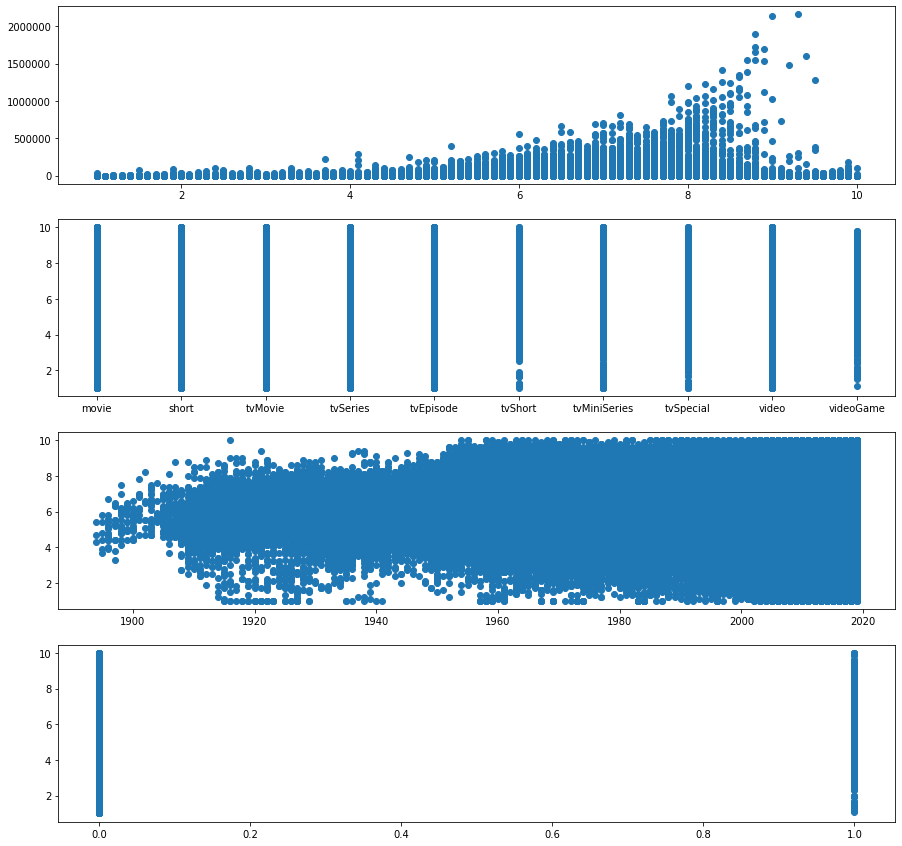

In [20]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(15,15))

plt.subplot(4, 1, 1)
plt.scatter(df['averageRating'], df['numVotes'])
plt.subplot(4, 1, 2)
plt.scatter(df['titleType'], df['averageRating'])
plt.subplot(4, 1, 3)
plt.scatter(df['startYear'], df['averageRating'])
plt.subplot(4, 1, 4)
plt.scatter(df['isAdult'], df['averageRating'])
plt.show()

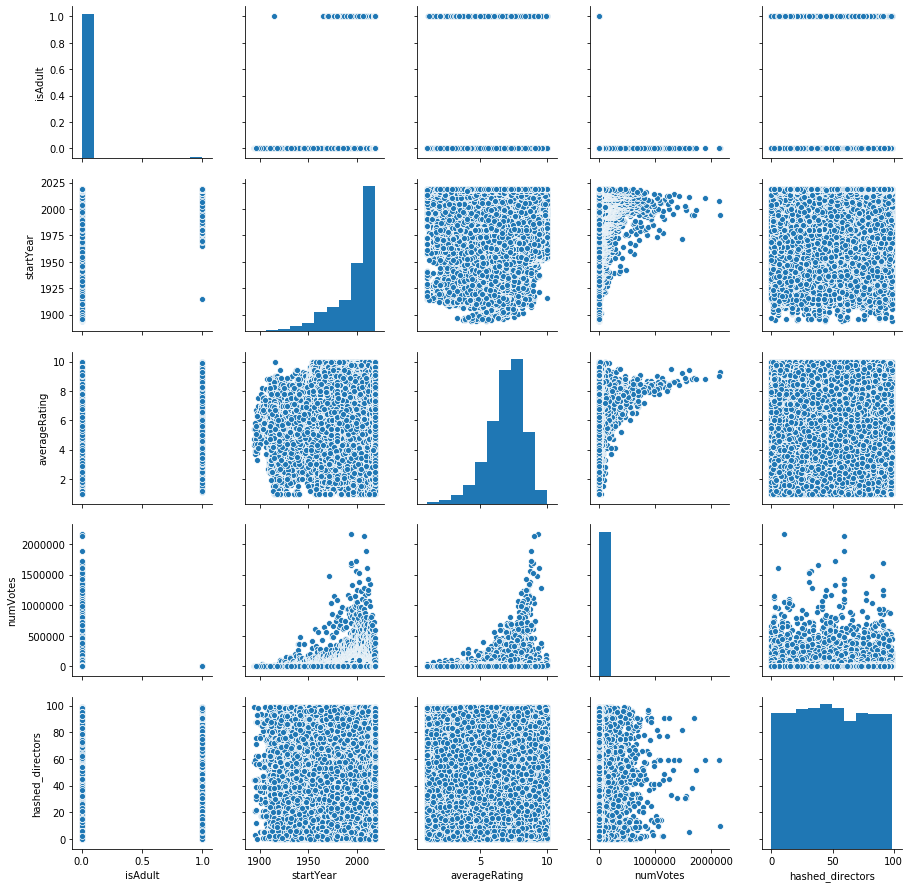

,startYear,averageRating,numVotes,hashed_directors
startYear,1,0.109389,0.0141155,0.000343084
averageRating,0.109389,1,0.0160271,-0.00474726
numVotes,0.0141155,0.0160271,1,-0.00183589
hashed_directors,0.000343084,-0.00474726,-0.00183589,1


In [21]:
# library for plots
import seaborn as sns
import matplotlib.pyplot as plt
 
# Basic correlogram
sns.pairplot(df)
plt.show()

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [22]:
def convrt_to_cat_val(num):
    x = ''
    if 0 <= num <= 3.3:
        x = 0
    elif 3.3 < num <= 6.6:
        x = 1
    elif 6.6 < num <= 10:
        x = 2
    return x

In [23]:
# Converting the Average Rating to Bins which are equally distributed. 
df['aRating_eq_bin'] = df['averageRating'].apply(lambda x: convrt_to_cat_val(x))
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,genres,averageRating,numVotes,directors,writers,hashed_directors,aRating_eq_bin
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,[Romance],5.4,81,[nm0085156],[nm0085156],99,1
1,tt0000036,short,Awakening of Rip,Awakening of Rip,0,1896,"[Drama, Short]",4.5,453,[nm0005690],[nm0410331],44,1
2,tt0000076,short,Exit of Rip and the Dwarf,Exit of Rip and the Dwarf,0,1896,"[Drama, Short]",4.5,397,[nm0005690],[nm0410331],44,1
3,tt0000091,short,The House of the Devil,Le manoir du diable,0,1896,"[Horror, Short]",6.7,2507,[nm0617588],[nm0617588],88,2
4,tt0000108,short,Rip Leaving Sleepy Hollow,Rip Leaving Sleepy Hollow,0,1896,"[Drama, Short]",4.4,408,[nm0005690],[nm0410331],44,1


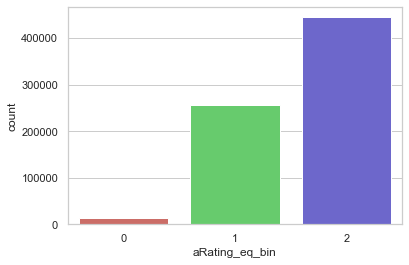

In [24]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#draw histogram plot
sns.countplot(df['aRating_eq_bin'], palette = 'hls')
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713449 entries, 0 to 725606
Data columns (total 13 columns):
tconst              713449 non-null object
titleType           713449 non-null category
primaryTitle        713449 non-null object
originalTitle       713449 non-null object
isAdult             713449 non-null category
startYear           713449 non-null int64
genres              713449 non-null object
averageRating       713449 non-null float64
numVotes            713449 non-null int64
directors           713449 non-null object
writers             713449 non-null object
hashed_directors    713449 non-null int64
aRating_eq_bin      713449 non-null int64
dtypes: category(2), float64(1), int64(4), object(6)
memory usage: 86.7+ MB


Drop Columns with no average Rating as we are going to predict Rating

In [26]:
#df2 = df[df['averageRating'].notnull()][['tconst','titleType', 'primaryTitle','originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes', 'directors', 'writers', 'aRating_eq_bin', 'aRating_qant_bin']]
df2 = df[df['averageRating'].notnull()][['tconst','titleType', 'isAdult', 'startYear', 'genres', 'numVotes', 'directors', 'writers', 'aRating_eq_bin', 'averageRating']]
print(df2.count())

tconst            713449
titleType         713449
isAdult           713449
startYear         713449
genres            713449
numVotes          713449
directors         713449
writers           713449
aRating_eq_bin    713449
averageRating     713449
dtype: int64


In [27]:
print(df2.genres)

0                              [Romance]
1                         [Drama, Short]
2                         [Drama, Short]
3                        [Horror, Short]
4                         [Drama, Short]
                       ...              
725602                           [Drama]
725603                           [Drama]
725604       [Adventure, Comedy, Family]
725605                    [Drama, Short]
725606    [Adventure, Biography, Comedy]
Name: genres, Length: 713449, dtype: object


In [28]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713449 entries, 0 to 725606
Data columns (total 10 columns):
tconst            713449 non-null object
titleType         713449 non-null category
isAdult           713449 non-null category
startYear         713449 non-null int64
genres            713449 non-null object
numVotes          713449 non-null int64
directors         713449 non-null object
writers           713449 non-null object
aRating_eq_bin    713449 non-null int64
averageRating     713449 non-null float64
dtypes: category(2), float64(1), int64(3), object(4)
memory usage: 50.3+ MB
None


In [29]:
df2.agg(['nunique','count','size'])
# We have too many Primary Titles and Original Title. I feel they won't be of much help for my analysis.
# so I am dropping off them form dataset.

,tconst,titleType,isAdult,startYear,genres,numVotes,directors,writers,aRating_eq_bin,averageRating
nunique,713449,10,2,126,NaN,17180,NaN,NaN,3,91
count,713449,713449,713449,713449,713449.0,713449,713449.0,713449.0,713449,713449
size,713449,713449,713449,713449,713449.0,713449,713449.0,713449.0,713449,713449


In [30]:
#df2.drop(columns=['primaryTitle', 'originalTitle', 'directors', 'writers', 'averageRating', 'endYear'], inplace = True)

In [31]:
#Verify The Rest Data
df2.agg(['nunique','count','size'])

,tconst,titleType,isAdult,startYear,genres,numVotes,directors,writers,aRating_eq_bin,averageRating
nunique,713449,10,2,126,NaN,17180,NaN,NaN,3,91
count,713449,713449,713449,713449,713449.0,713449,713449.0,713449.0,713449,713449
size,713449,713449,713449,713449,713449.0,713449,713449.0,713449.0,713449,713449


In [32]:
import matplotlib.pyplot as plt
#df2['runtimeMinutes'] = df2['runtimeMinutes'].apply(pd.to_numeric, errors='ignore')
#df2['runtimeMinutes'] = df2['runtimeMinutes'].fillna(df2['runtimeMinutes'].mean())
#df2['startYear'] = df2['startYear'].fillna(method='ffill')
#df2['genres'] = df2['genres'].fillna(method='ffill')
#print(df2['runtimeMinutes'].min())
#print(df2['runtimeMinutes'].max())
#plt.plot(df2['runtimeMinutes'])
#plt.ylabel('Runtime In Minutes')
#plt.show()
#df2['runtimeMinutes'].plot(kind='hist')

In [33]:
#Use Quantiles to slipt the Averaging ratings so each bin is equally distributed
#bin_labels = ['Small', 'Medium', 'Long', 'Very_Long']
#df2['runtimeMinutes_q'] = pd.qcut(df2.runtimeMinutes,4,labels=bin_labels)
#print(df2['runtimeMinutes_q'])

In [34]:
#Verify Data Now
#df2.agg(['nunique','count','size'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713449 entries, 0 to 725606
Data columns (total 10 columns):
tconst            713449 non-null object
titleType         713449 non-null category
isAdult           713449 non-null category
startYear         713449 non-null int64
genres            713449 non-null object
numVotes          713449 non-null int64
directors         713449 non-null object
writers           713449 non-null object
aRating_eq_bin    713449 non-null int64
averageRating     713449 non-null float64
dtypes: category(2), float64(1), int64(3), object(4)
memory usage: 50.3+ MB


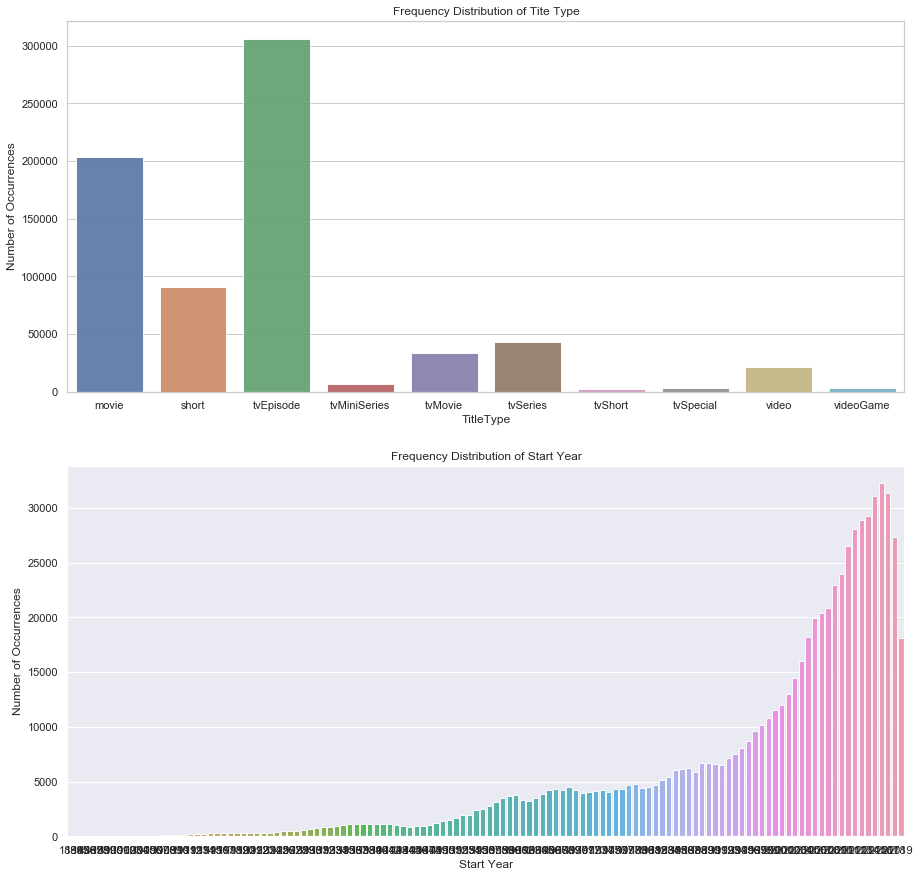

In [35]:
df2.info()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,15))


plt.subplot(2, 1, 1)
df2_titleType = df2['titleType'].value_counts()
sns.set(style="darkgrid")
sns.barplot(df2_titleType.index, df2_titleType.values, alpha=0.9)
plt.title('Frequency Distribution of Tite Type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('TitleType', fontsize=12)

plt.subplot(2, 1, 2)
df2_startYear = df2['startYear'].value_counts()
sns.set(style="darkgrid")
sns.barplot(df2_startYear.index, df2_startYear.values, alpha=0.9)
plt.title('Frequency Distribution of Start Year')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Start Year', fontsize=12)

#plt.subplot(3, 1, 3)
#df2_runtimeMinutes_q = df2['runtimeMinutes_q'].value_counts()
#sns.set(style="darkgrid")
#sns.barplot(df2_runtimeMinutes_q.index, df2_runtimeMinutes_q.values, alpha=0.9)
#plt.title('Frequency Distribution of Movie Length')
#plt.ylabel('Number of Occurrences', fontsize=12)
#plt.xlabel('Movie Length', fontsize=12)
plt.show()


df2['startYear'] = pd.to_numeric(df2['startYear'])
#df2.drop(df2.index[df2['startYear']  > 1940], inplace = True)
#df2.drop(df2.loc[df2['startYear']  < 2000].index, inplace = True)
print(df2.shape)
print(df2.info())
plt.figure(figsize=(15,15))

plt.subplot(2, 1, 1)
df2_titleType2 = df2['titleType'].value_counts()
sns.set(style="darkgrid")
sns.barplot(df2_titleType2.index, df2_titleType2.values, alpha=0.9)
plt.title('Frequency Distribution of Tite Type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('TitleType', fontsize=12)

plt.subplot(2, 1, 2)
df2_startYear2 = df2['startYear'].value_counts()
sns.set(style="darkgrid")
sns.barplot(df2_startYear2.index, df2_startYear2.values, alpha=0.9)
plt.title('Frequency Distribution of Start Year')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Start Year', fontsize=12)

#plt.subplot(3, 1, 3)
#df2_runtimeMinutes_q2 = df2['runtimeMinutes_q'].value_counts()
#sns.set(style="darkgrid")
#sns.barplot(df2_runtimeMinutes_q2.index, df2_runtimeMinutes_q2.values, alpha=0.9)
#plt.title('Frequency Distribution of Movie Length')
#plt.ylabel('Number of Occurrences', fontsize=12)
#plt.xlabel('Movie Length', fontsize=12)
plt.show()

In [36]:
print(df2.shape)

(713449, 10)


In [37]:
import pickle
df2.to_pickle('my_df.pickle')

# Load Saved Dataframe from Pickle File - 
### Approach 1- Dealing with Imbalanced Datasets - Using Xgboost

In [38]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
!pip install imblearn
from imblearn.over_sampling import SMOTE
df2pk = pd.read_pickle('my_df.pickle')

In [39]:
df2pk.head()

,tconst,titleType,isAdult,startYear,genres,numVotes,directors,writers,aRating_eq_bin,averageRating
0,tt0000009,movie,0,1894,[Romance],81,[nm0085156],[nm0085156],1,5.4
1,tt0000036,short,0,1896,"[Drama, Short]",453,[nm0005690],[nm0410331],1,4.5
2,tt0000076,short,0,1896,"[Drama, Short]",397,[nm0005690],[nm0410331],1,4.5
3,tt0000091,short,0,1896,"[Horror, Short]",2507,[nm0617588],[nm0617588],2,6.7
4,tt0000108,short,0,1896,"[Drama, Short]",408,[nm0005690],[nm0410331],1,4.4


In [40]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

df2pk = df2pk.join(pd.DataFrame(mlb.fit_transform(df2pk.pop('genres')),
                          columns=mlb.classes_,
                          index=df2pk.index))
#df2pkN = df2pkN.join(pd.DataFrame(mlb.fit_transform(df2pkN.pop('genres')),
#                          columns=mlb.classes_,
#                          index=df2pkN.index))

In [41]:
#Due to memory limitation, I am slicing the dtaframe to 20% of the data.
from sklearn.utils import shuffle
df2pk = shuffle(df2pk)
df3 = df2pk.sample(frac=0.50).reset_index(drop=True)
print(df2pk.shape)
print(df3.shape)
print(df3.head())

(713449, 37)
(356724, 37)
      tconst  titleType isAdult  startYear  numVotes               directors  \
0  tt5327410      movie       0       2018       311             [nm2278268]   
1  tt1302950  tvEpisode       0       2008        61             [nm0500399]   
2  tt1275290  tvEpisode       0       2005         6  [nm0412541, nm1541186]   
3  tt0345191      movie       0       1968         7             [nm0258902]   
4  tt0202106      video       1       1999         6             [nm0619475]   

                  writers  aRating_eq_bin  averageRating  Action  ...  News  \
0             [nm2278268]               1            6.2       0  ...     0   
1  [nm0648051, nm3149101]               1            6.2       0  ...     0   
2  [nm2040794, nm2448218]               2            7.0       0  ...     0   
3  [nm0438810, nm0960106]               2            7.6       0  ...     0   
4             [nm0619475]               1            5.7       0  ...     0   

   Reality-TV  Rom

In [42]:
import hashlib
X = df3.drop(columns=['startYear', 'tconst','aRating_eq_bin','writers', 'directors', 'numVotes', 'averageRating'])
y = df3['aRating_eq_bin'].copy()


ratio_train = 0.8
ratio_val = 0.1
ratio_test = 0.1

# Produces test split.
x_remaining, X_test, y_remaining, y_test = train_test_split(
    X, y, test_size=ratio_test)

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Produces train and val splits.
X_train, X_val, y_train, y_val = train_test_split(
    x_remaining, y_remaining, test_size=ratio_val_adjusted)

In [43]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=True, handle_unknown='ignore')
print("categories: " , ohe)
X_train_ohe = ohe.fit_transform(X_train)
#print(X_train_ohe)

categories:  OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)


In [44]:
X_test_ohe = ohe.transform(X_test)
#print(X_test_ohe)

In [45]:
X_val_ohe = ohe.transform(X_val)
#print(X_val_ohe)

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_20newsgroups_vectorized 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.utils import class_weight
h = .02  # step size in the mesh

In [47]:
from sklearn.metrics import confusion_matrix
def execute_model(names,classifiers):
    i = 1
    # iterate over datasets
    results = {}
    class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train), y_train)
    # preprocess dataset, split into training and test part
    # X_test_ohe
    # X_train_ohe
    # y_train
    # y_test
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        import time        
        cur_time = time.time()
        clf.fit(X_train_ohe, y_train)
        #clf.fit(X_train_ohe, y_train, sample_weight = class_weights)
        training_time = time.time() - cur_time

        cur_time = time.time()
        score = clf.score(X_test_ohe, y_test)
        testing_time = time.time() - cur_time
        
        cur_time = time.time()
        train_accuracy = clf.score(X_train_ohe, y_train)
        scoring = ['precision_macro', 'recall_macro']
        scores = cross_validate(clf, X_val_ohe, y_val, scoring = scoring, cv=2)
        sorted(scores.keys())
        score_time = time.time() - cur_time
        print(name)
        print(scores)
        #print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        results[name] = [training_time, testing_time, score_time, train_accuracy, score]
        i += 1
        print('executing: ' + name)
        dfk = pd.DataFrame.from_dict(
            results, orient='index',
            columns=['Train Time', 'Test Time', 'Cross validation Time','Train Acc', 'Test Acc'])
    display(dfk)

In [48]:
import random
#XGBClassifier
#https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn
from xgboost import XGBClassifier as xgb
names = ["XGBClassifier"]
xgb_params = {'learning_rate': 0.25, 
              'max_depth': 15,
              'subsample': 0.5,        
              'colsample_bytree': 0.9,
              'objective': 'multi:softmax',
              'silent': 1, 
              'n_estimators':190,
              'scale_pos_weight': 0.8,
              'gamma':6,         
              'min_child_weight':8,
              "subsample": random.uniform(0.6, 0.4),
              'eta':1
            }   


classifiers = [xgb(**xgb_params, seed = 10, num_boost_round=10, nfold=5,
             metrics={'error'})]
execute_model(names,classifiers)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


XGBClassifier
{'fit_time': array([36.6559689 , 36.70982289]), 'score_time': array([0.51523805, 0.47183323]), 'test_precision_macro': array([0.45888102, 0.45593929]), 'test_recall_macro': array([0.45617465, 0.45314409])}
executing: XGBClassifier


,Train Time,Test Time,Cross validation Time,Train Acc,Test Acc
XGBClassifier,796.276898,1.092852,83.004136,0.721997,0.719312


### I tried to use this model, but due to multiclass label, it was not accepting the non binary values in y. I plan to explore more and see if I can use it by tweaking little bit. But for now, for project its not an executing code.

from sklearn.model_selection import StratifiedKFold

def online2(X_org, y_org, test_x, test_uid):
    n_folds = 5
    verbose = True
    shuffle = False

    X = X_org
    y = y_org
    X_submission = test_x

    if shuffle:
        idx = np.random.permutation(y.size)
        X = X[idx]
        y = y[idx]

    skf = list(StratifiedKFold(y, n_folds))

    clfs = [
        RandomForestClassifier().set_params(**INITIAL_PARAMS.get("RFC:one", {})),
        ExtraTreesClassifier().set_params(**INITIAL_PARAMS.get("ETC:one", {})),
        GradientBoostingClassifier().set_params(**INITIAL_PARAMS.get("GBC:one", {})),
        LogisticRegression().set_params(**INITIAL_PARAMS.get("LR:one", {})),
        # xgb.XGBClassifier().set_params(**INITIAL_PARAMS.get("XGBC:two", {})),
        # xgb.XGBClassifier().set_params(**INITIAL_PARAMS.get("XGBC:one", {})),
        ]

    print("Creating train and test sets for blending.")

    dataset_blend_train = np.zeros((X.shape[0], len(clfs)))
    dataset_blend_test = np.zeros((X_submission.shape[0], len(clfs)))

    for j, clf in enumerate(clfs):
        print(j, clf)
        dataset_blend_test_j = np.zeros((X_submission.shape[0], len(skf)))
        for i, (train, test) in enumerate(skf):
            print("Fold", i)
            X_train = X[train]
            y_train = y[train]
            clf.fit(X_train, y_train)
            dataset_blend_test_j[:, i] = clf.predict_proba(X_submission)[:, 1]
        dataset_blend_test[:,j] = dataset_blend_test_j.mean(1)
        save_submission(os.path.join(consts.SUBMISSION_PATH,
                                         clf.__class__.__name__ + '_' + strftime("%m_%d_%H_%M_%S", localtime()) + '.csv'),
                            test_uid, dataset_blend_test[:, j]) 

X_org = X_train_ohe
y_org = y_train
test_x = X_test_ohe
test_uid = y_test
online2(X_org, y_org, test_x, test_uid)

# Load Saved Dataframe from Pickle File - 
### Approach 2- Dealing with Imbalanced Datasets - Using SMOTE

In [49]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
!pip install imblearn
from imblearn.over_sampling import SMOTE
dfTemp = pd.read_pickle('my_df.pickle')

In [50]:
df2pk = dfTemp.groupby(["aRating_eq_bin"]).apply(lambda x: x.sort_values(["genres"], ascending = False)).reset_index(drop=True)
print(df2pk.head())
print(df2pk.shape)

      tconst  titleType isAdult  startYear     genres  numVotes    directors  \
0  tt0023035      movie       0       1932  [Western]        35  [nm0569645]   
1  tt3979962      movie       0       2015  [Western]        12  [nm2483722]   
2  tt0065596      movie       0       1970  [Western]       413  [nm0823630]   
3  tt0754275  tvEpisode       0       1959  [Western]        76  [nm0575546]   
4  tt0754270  tvEpisode       0       1961  [Western]        81  [nm0020765]   

                             writers  aRating_eq_bin  averageRating  
0                        [nm0604679]               0            3.2  
1  [nm2483722, nm6722575, nm2508576]               0            3.2  
2             [nm0532360, nm0731149]               0            3.2  
3             [nm0386928, nm0149490]               0            2.6  
4                        [nm0314558]               0            2.7  
(713449, 10)


In [51]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

df2pk = df2pk.join(pd.DataFrame(mlb.fit_transform(df2pk.pop('genres')),
                          columns=mlb.classes_,
                          index=df2pk.index))
#df2pkN = df2pkN.join(pd.DataFrame(mlb.fit_transform(df2pkN.pop('genres')),
#                          columns=mlb.classes_,
#                          index=df2pkN.index))

In [52]:
#Due to memory limitation, I am slicing the dtaframe to 20% of the data.
from sklearn.utils import shuffle
df2pk = shuffle(df2pk)
df3 = df2pk.sample(frac=0.05).reset_index(drop=True)
print(df2pk.shape)
print(df3.shape)
print(df3.head())

(713449, 37)
(35672, 37)
      tconst  titleType isAdult  startYear  numVotes    directors  \
0  tt1193503      video       0       2007        13  [nm1909662]   
1  tt5074722  tvEpisode       0       2015       175  [nm0462277]   
2  tt4066836      movie       0       2016       543  [nm2066573]   
3  tt7720470  tvEpisode       0       2018        71  [nm0001726]   
4  tt2189714      movie       0       2012       198  [nm0227187]   

                                             writers  aRating_eq_bin  \
0                                        [nm1909662]               2   
1  [nm1529941, nm4170842, nm0074165, nm2488633, n...               2   
2                             [nm2066573, nm2468735]               1   
3  [nm0637497, nm8274771, nm0275650, nm0394356, n...               2   
4                                        [nm0227187]               1   

   averageRating  Action  ...  News  Reality-TV  Romance  Sci-Fi  Short  \
0            8.5       0  ...     0           0     

In [53]:
import hashlib
X = df3.drop(columns=['startYear', 'tconst','aRating_eq_bin','writers', 'directors', 'numVotes', 'averageRating'])
y = df3['aRating_eq_bin'].copy()

#X_train = df2pkN.drop(columns=['numVotes', 'startYear', 'tconst','aRating_eq_bin','writers', 'directors', 'averageRating'])
#y_train = df2pkN['aRating_eq_bin'].copy()


print(X.info())
print(y.head())

#X_test, X_val, y_test, y_val = train_test_split(
#    X, y, test_size=0.5)


ratio_train = 0.8
ratio_val = 0.1
ratio_test = 0.1

# Produces test split.
x_remaining, X_test, y_remaining, y_test = train_test_split(
    X, y, test_size=ratio_test)

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Produces train and val splits.
X_train, X_val, y_train, y_val = train_test_split(
    x_remaining, y_remaining, test_size=ratio_val_adjusted)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35672 entries, 0 to 35671
Data columns (total 30 columns):
titleType      35672 non-null category
isAdult        35672 non-null category
Action         35672 non-null int64
Adult          35672 non-null int64
Adventure      35672 non-null int64
Animation      35672 non-null int64
Biography      35672 non-null int64
Comedy         35672 non-null int64
Crime          35672 non-null int64
Documentary    35672 non-null int64
Drama          35672 non-null int64
Family         35672 non-null int64
Fantasy        35672 non-null int64
Film-Noir      35672 non-null int64
Game-Show      35672 non-null int64
History        35672 non-null int64
Horror         35672 non-null int64
Music          35672 non-null int64
Musical        35672 non-null int64
Mystery        35672 non-null int64
News           35672 non-null int64
Reality-TV     35672 non-null int64
Romance        35672 non-null int64
Sci-Fi         35672 non-null int64
Short          35672 

In [54]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=True, handle_unknown='ignore')
print("categories: " , ohe)
X_train_ohe = ohe.fit_transform(X_train)
X_train_ohe

categories:  OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)


<28536x68 sparse matrix of type '<class 'numpy.float64'>'
	with 856080 stored elements in Compressed Sparse Row format>

In [55]:
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train_ohe, y_train)

In [56]:
print(X_train_ohe.shape)
print(X_sm.shape)

(28536, 68)
(45945, 68)


In [57]:
X_test_ohe = ohe.transform(X_test)
#print(X_test_ohe)
#print(X_test_ohe.shape)

In [58]:
from sklearn.metrics import confusion_matrix
def execute_model(names,classifiers):
    i = 1
    # iterate over datasets
    results = {}
    class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train), y_train)
    # preprocess dataset, split into training and test part
    # X_test_ohe
    # X_train_ohe
    # y_train
    # y_test
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        import time        
        cur_time = time.time()
        clf.fit(X_train_ohe, y_train)
        #clf.fit(X_train_ohe, y_train, sample_weight = class_weights)
        training_time = time.time() - cur_time

        cur_time = time.time()
        score = clf.score(X_test_ohe, y_test)
        testing_time = time.time() - cur_time
        
        cur_time = time.time()
        train_accuracy = clf.score(X_train_ohe, y_train)
        scoring = ['precision_macro', 'recall_macro']
        #scores = cross_validate(clf, X_val_ohe, y_val, scoring = scoring, cv=2)
        #sorted(scores.keys())
        score_time = time.time() - cur_time
        print(name)
        #print(scores)
        #print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        results[name] = [training_time, testing_time, score_time, train_accuracy, score]
        i += 1
        print('executing: ' + name)
        dfk = pd.DataFrame.from_dict(
            results, orient='index',
            columns=['Train Time', 'Test Time', 'Cross validation Time','Train Acc', 'Test Acc'])
    display(dfk)

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_20newsgroups_vectorized 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.utils import class_weight
h = .2  # step size in the mesh

In [67]:
names = [   "Decision Tree", 
            "Random Forest", 
            "Neural Net", 
            "AdaBoost",
            "Nearest Neighbors"]

classifiers = [
    DecisionTreeClassifier(max_depth=15),
    RandomForestClassifier(max_depth=15, n_estimators=100, max_features=15),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    KNeighborsClassifier(10)]

In [68]:
execute_model(names,classifiers)

Decision Tree
executing: Decision Tree
Random Forest
executing: Random Forest
Neural Net
executing: Neural Net
AdaBoost
executing: AdaBoost
Nearest Neighbors
executing: Nearest Neighbors


,Train Time,Test Time,Cross validation Time,Train Acc,Test Acc
Decision Tree,0.664230,0.001634,0.007817,0.732303,0.721693
Random Forest,18.872363,0.089952,0.647851,0.734301,0.722534
Neural Net,18.414712,0.017435,0.179787,0.714676,0.721973
AdaBoost,2.028636,0.056904,0.313551,0.710015,0.716648
Nearest Neighbors,0.006984,10.028471,78.128069,0.712819,0.699271


###Try with XGBoost with SMOTE

In [69]:
import random
#XGBClassifier
#https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn
from xgboost import XGBClassifier as xgb
names = ["XGBClassifier"]
xgb_params = {'learning_rate': 0.25, 
              'max_depth': 5,
              'subsample': 0.5,        
              'colsample_bytree': 0.9,
              'objective': 'multi:softprob',
              'silent': 1, 
              'n_estimators':190, 
              'gamma':6,         
              'min_child_weight':8}   

params = {
    "colsample_bytree": random.uniform(0.7, 0.3),
    "gamma": random.uniform(0, 0.5),
    "learning_rate": random.uniform(0.03, 0.3), # default 0.1 
    "max_depth": random.randint(2, 9), # default 3
    "n_estimators": random.randint(75, 150), # default 100
    "subsample": random.uniform(0.6, 0.4)
}

classifiers = [xgb(**xgb_params, seed = 10)]
execute_model(names,classifiers)

XGBClassifier
executing: XGBClassifier


,Train Time,Test Time,Cross validation Time,Train Acc,Test Acc
XGBClassifier,31.181095,0.049483,0.381343,0.717129,0.722253


Trying XGBBoost- 
X_train_ohe, y_train, X_test_ohe, y_test, X_val_ohe, y_val

###AUC: the dataset only contains pos or neg samples: With 5% data I am getting thsi error. Increasing more dataset will solve the issue but with my laptop, it crashes the notebook

import xgboost as xgb
dtrain = xgb.DMatrix(X_train_ohe,label=y_train)
dtest = xgb.DMatrix(X_test_ohe, label=y_test)
param = {'max_depth': 2, 'eta': 1, 'objective': 'reg:tweedie'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

evallist = [(dtest, 'eval'), (dtrain, 'train')]


num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=10)

dtest = xgb.DMatrix(data)
ypred = bst.predict(dtest)

ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)


xgb.plot_importance(bst)

xgb.plot_tree(bst, num_trees=2)

xgb.to_graphviz(bst, num_trees=2)

# Load Saved Dataframe from Pickle

### Pick Balanced data for each class and perform Modeling
### Approach 3- Dealing with Imbalanced Datasets - Using Underscaling majority class and boosting minor class

In [70]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
!pip install imblearn
from imblearn.over_sampling import SMOTE

dfTemp = pd.read_pickle('my_df.pickle')

In [71]:
dfTemp.head()

,tconst,titleType,isAdult,startYear,genres,numVotes,directors,writers,aRating_eq_bin,averageRating
0,tt0000009,movie,0,1894,[Romance],81,[nm0085156],[nm0085156],1,5.4
1,tt0000036,short,0,1896,"[Drama, Short]",453,[nm0005690],[nm0410331],1,4.5
2,tt0000076,short,0,1896,"[Drama, Short]",397,[nm0005690],[nm0410331],1,4.5
3,tt0000091,short,0,1896,"[Horror, Short]",2507,[nm0617588],[nm0617588],2,6.7
4,tt0000108,short,0,1896,"[Drama, Short]",408,[nm0005690],[nm0410331],1,4.4


In [72]:
dfTemp1 = dfTemp.groupby(["aRating_eq_bin"]).apply(lambda x: x.sort_values(["genres"], ascending = False)).reset_index(drop=True)
# select top N rows within each continent
df2pk = dfTemp1.groupby("aRating_eq_bin").head(10000)
print(df2pk.head())
print(df2pk.shape)

      tconst  titleType isAdult  startYear     genres  numVotes    directors  \
0  tt0023035      movie       0       1932  [Western]        35  [nm0569645]   
1  tt3979962      movie       0       2015  [Western]        12  [nm2483722]   
2  tt0065596      movie       0       1970  [Western]       413  [nm0823630]   
3  tt0754275  tvEpisode       0       1959  [Western]        76  [nm0575546]   
4  tt0754270  tvEpisode       0       1961  [Western]        81  [nm0020765]   

                             writers  aRating_eq_bin  averageRating  
0                        [nm0604679]               0            3.2  
1  [nm2483722, nm6722575, nm2508576]               0            3.2  
2             [nm0532360, nm0731149]               0            3.2  
3             [nm0386928, nm0149490]               0            2.6  
4                        [nm0314558]               0            2.7  
(30000, 10)


In [73]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

df2pk = df2pk.join(pd.DataFrame(mlb.fit_transform(df2pk.pop('genres')),
                          columns=mlb.classes_,
                          index=df2pk.index))
#df2pkN = df2pkN.join(pd.DataFrame(mlb.fit_transform(df2pkN.pop('genres')),
#                          columns=mlb.classes_,
#                          index=df2pkN.index))

In [74]:
#Due to memory limitation, I am slicing the dtaframe to 20% of the data.
from sklearn.utils import shuffle
df2pk = shuffle(df2pk)
df3 = df2pk.sample(frac=0.10).reset_index(drop=True)
print(df2pk.shape)
print(df3.shape)
print(df3.head())

(30000, 32)
(3000, 32)
      tconst  titleType isAdult  startYear  numVotes    directors  \
0  tt9391986      movie       0       2019        52  [nm2921854]   
1  tt1172505      movie       0       1986       281  [nm0351410]   
2  tt0047130      movie       0       1954       104  [nm0057983]   
3  tt0408034  tvSpecial       0       2004       185  [nm0357143]   
4  tt0041216      movie       0       1940         6  [nm0434908]   

                                             writers  aRating_eq_bin  \
0                                        [nm2921854]               0   
1                             [nm0476899, nm2556482]               1   
2  [nm0064305, nm0185292, nm0057983, nm0308020, n...               1   
3  [nm0070500, nm0071304, nm0247063, nm0321835, n...               0   
4                                        [nm0731819]               1   

   averageRating  Comedy  ...  News  Reality-TV  Romance  Sci-Fi  Short  \
0            3.2       0  ...     0           0       

In [75]:
import hashlib
X = df3.drop(columns=['startYear', 'tconst','aRating_eq_bin','writers', 'directors', 'numVotes', 'averageRating'])
y = df3['aRating_eq_bin'].copy()

#X_train = df2pkN.drop(columns=['numVotes', 'startYear', 'tconst','aRating_eq_bin','writers', 'directors', 'averageRating'])
#y_train = df2pkN['aRating_eq_bin'].copy()


print(X.info())
print(y.head())

#X_test, X_val, y_test, y_val = train_test_split(
#    X, y, test_size=0.5)


ratio_train = 0.8
ratio_val = 0.1
ratio_test = 0.1

# Produces test split.
x_remaining, X_test, y_remaining, y_test = train_test_split(
    X, y, test_size=ratio_test)

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Produces train and val splits.
X_train, X_val, y_train, y_val = train_test_split(
    x_remaining, y_remaining, test_size=ratio_val_adjusted)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
titleType      3000 non-null category
isAdult        3000 non-null category
Comedy         3000 non-null int64
Crime          3000 non-null int64
Documentary    3000 non-null int64
Drama          3000 non-null int64
Family         3000 non-null int64
Fantasy        3000 non-null int64
Film-Noir      3000 non-null int64
Game-Show      3000 non-null int64
History        3000 non-null int64
Horror         3000 non-null int64
Music          3000 non-null int64
Musical        3000 non-null int64
Mystery        3000 non-null int64
News           3000 non-null int64
Reality-TV     3000 non-null int64
Romance        3000 non-null int64
Sci-Fi         3000 non-null int64
Short          3000 non-null int64
Sport          3000 non-null int64
Talk-Show      3000 non-null int64
Thriller       3000 non-null int64
War            3000 non-null int64
Western        3000 non-null int64
dtypes: cate

In [76]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=True, handle_unknown='ignore')
print("categories: " , ohe)
X_train_ohe = ohe.fit_transform(X_train)
X_train_ohe

categories:  OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)


<2400x56 sparse matrix of type '<class 'numpy.float64'>'
	with 60000 stored elements in Compressed Sparse Row format>

In [77]:
X_test_ohe = ohe.transform(X_test)
#print(X_test_ohe)

In [78]:
X_val_ohe = ohe.transform(X_val)
#print(X_val_ohe)

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_20newsgroups_vectorized 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.utils import class_weight
h = .02  # step size in the mesh

In [80]:
from sklearn.metrics import confusion_matrix
def execute_model(names,classifiers):
    i = 1
    # iterate over datasets
    results = {}
    #class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train), y_train)
    # preprocess dataset, split into training and test part
    # X_test_ohe
    # X_train_ohe
    # y_train
    # y_test
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        import time        
        cur_time = time.time()
        clf.fit(X_train_ohe, y_train)
        #clf.fit(X_train_ohe, y_train, sample_weight = class_weights)
        training_time = time.time() - cur_time

        cur_time = time.time()
        score = clf.score(X_test_ohe, y_test)
        testing_time = time.time() - cur_time
        
        cur_time = time.time()
        train_accuracy = clf.score(X_train_ohe, y_train)
        scoring = ['precision_macro', 'recall_macro']
        scores = cross_validate(clf, X_val_ohe, y_val, scoring = scoring, cv=2)
        sorted(scores.keys())
        score_time = time.time() - cur_time
        print(name)
        print(scores)
        #print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        results[name] = [training_time, testing_time, score_time, train_accuracy, score]
        i += 1
        print('executing: ' + name)
        dfk = pd.DataFrame.from_dict(
            results, orient='index',
            columns=['Train Time', 'Test Time', 'Cross validation Time','Train Acc', 'Test Acc'])
    display(dfk)

In [81]:
#class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train), y_train)

namesAll = ["RBF SVM", 
            "Linear SVM", 
            "Decision Tree", 
            "Random Forest", 
            "Neural Net", 
            "AdaBoost",
            "Nearest Neighbors"]

classifiersAll = [
    SVC(gamma=1, C=0.8, class_weight="balanced"),
    SVC(kernel="linear", C=0.25, class_weight="balanced", random_state=0),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    KNeighborsClassifier(3)]

In [82]:
execute_model(namesAll,classifiersAll)

RBF SVM
{'fit_time': array([0.00257993, 0.00250435]), 'score_time': array([0.00417709, 0.00443959]), 'test_precision_macro': array([0.79783766, 0.78707863]), 'test_recall_macro': array([0.80407409, 0.80107151])}
executing: RBF SVM
Linear SVM
{'fit_time': array([0.00385809, 0.00338101]), 'score_time': array([0.00434184, 0.00383401]), 'test_precision_macro': array([0.82434961, 0.80586081]), 'test_recall_macro': array([0.80421237, 0.78501547])}
executing: Linear SVM
Decision Tree
{'fit_time': array([0.00138211, 0.00114799]), 'score_time': array([0.00199199, 0.00235105]), 'test_precision_macro': array([0.8386069, 0.8611301]), 'test_recall_macro': array([0.79936708, 0.80664537])}
executing: Decision Tree
Random Forest
{'fit_time': array([0.01293898, 0.0123198 ]), 'score_time': array([0.00418687, 0.00387383]), 'test_precision_macro': array([0.82921047, 0.822011  ]), 'test_recall_macro': array([0.80497028, 0.80241922])}
executing: Random Forest
Neural Net
{'fit_time': array([0.7765708 , 0.891

,Train Time,Test Time,Cross validation Time,Train Acc,Test Acc
RBF SVM,0.176894,0.020177,0.173849,0.872917,0.840000
Linear SVM,0.119666,0.016042,0.136600,0.863333,0.856667
Decision Tree,0.005531,0.000615,0.009044,0.775417,0.760000
Random Forest,0.016524,0.001684,0.038713,0.756250,0.776667
Neural Net,2.999822,0.001148,1.682680,0.867500,0.846667
AdaBoost,0.221564,0.015693,0.268741,0.830417,0.823333
Nearest Neighbors,0.002014,0.058723,0.509189,0.817500,0.790000


In [83]:
import random
#XGBClassifier
#https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn
from xgboost import XGBClassifier as xgb
names = ["XGBClassifier"]
xgb_params = {'learning_rate': 0.25, 
              'max_depth': 15,
              'subsample': 0.5,        
              'colsample_bytree': 0.9,
              'objective': 'multi:softprob',
              'silent': 1, 
              'n_estimators':190, 
              'gamma':6,         
              'min_child_weight':8}   

params = {
    "colsample_bytree": random.uniform(0.7, 0.3),
    "gamma": random.uniform(0, 0.5),
    "learning_rate": random.uniform(0.03, 0.3), # default 0.1 
    "max_depth": random.randint(2, 9), # default 3
    "n_estimators": random.randint(75, 150), # default 100
    "subsample": random.uniform(0.6, 0.4)
}

classifiers = [xgb(**xgb_params, seed = 10)]
execute_model(names,classifiers)

XGBClassifier
{'fit_time': array([0.13935065, 0.14391589]), 'score_time': array([0.00478101, 0.00464296]), 'test_precision_macro': array([0.73207389, 0.74188034]), 'test_recall_macro': array([0.71542011, 0.7261156 ])}
executing: XGBClassifier


,Train Time,Test Time,Cross validation Time,Train Acc,Test Acc
XGBClassifier,2.763066,0.00388,0.318345,0.855833,0.823333


# Load Saved Dataframe from Pickle

### Pick Balanced data for each class and perform Modeling
### Approach 4- Dealing with Imbalanced Datasets - Using diffrent SVN Kernels and Weights

In [84]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
!pip install imblearn
from imblearn.over_sampling import SMOTE

df2pk = pd.read_pickle('my_df.pickle')

In [85]:
df2pk = dfTemp.groupby(["aRating_eq_bin"]).apply(lambda x: x.sort_values(["genres"], ascending = False)).reset_index(drop=True)
print(df2pk.head())
print(df2pk.shape)

      tconst  titleType isAdult  startYear     genres  numVotes    directors  \
0  tt0023035      movie       0       1932  [Western]        35  [nm0569645]   
1  tt3979962      movie       0       2015  [Western]        12  [nm2483722]   
2  tt0065596      movie       0       1970  [Western]       413  [nm0823630]   
3  tt0754275  tvEpisode       0       1959  [Western]        76  [nm0575546]   
4  tt0754270  tvEpisode       0       1961  [Western]        81  [nm0020765]   

                             writers  aRating_eq_bin  averageRating  
0                        [nm0604679]               0            3.2  
1  [nm2483722, nm6722575, nm2508576]               0            3.2  
2             [nm0532360, nm0731149]               0            3.2  
3             [nm0386928, nm0149490]               0            2.6  
4                        [nm0314558]               0            2.7  
(713449, 10)


In [86]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

df2pk = df2pk.join(pd.DataFrame(mlb.fit_transform(df2pk.pop('genres')),
                          columns=mlb.classes_,
                          index=df2pk.index))

In [87]:
#Due to memory limitation, I am slicing the dtaframe to 5% of the data.
from sklearn.utils import shuffle
df2pk = shuffle(df2pk)
df3 = df2pk.sample(frac=0.05).reset_index(drop=True)
print(df2pk.shape)
print(df3.shape)
print(df3.head())

(713449, 37)
(35672, 37)
      tconst  titleType isAdult  startYear  numVotes  \
0  tt4156508   tvSeries       0       2014       899   
1  tt0574538  tvEpisode       0       1997        16   
2  tt0403591      short       0       2001       292   
3  tt3806928      short       0       2015         8   
4  tt0279213    tvMovie       0       1987       596   

                                      directors  \
0  [nm1043107, nm6875532, nm0379775, nm0379773]   
1                        [nm0155037, nm0420850]   
2                                   [nm1108047]   
3                                   [nm6572469]   
4                                   [nm0448632]   

                                             writers  aRating_eq_bin  \
0  [nm0364162, nm0379773, nm0317866, nm0841394, n...               2   
1                  [nm0000101, nm0317896, nm0000601]               2   
2                                        [nm1108047]               1   
3                                        [n

In [88]:
X = df3.drop(columns=['numVotes', 'startYear', 'tconst','aRating_eq_bin','writers', 'directors', 'averageRating'])
y = df3['aRating_eq_bin'].copy()

ratio_train = 0.8
ratio_val = 0.1
ratio_test = 0.1

# Produces test split.
x_remaining, X_test, y_remaining, y_test = train_test_split(
    X, y, test_size=ratio_test)

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Produces train and val splits.
X_train, X_val, y_train, y_val = train_test_split(
   x_remaining, y_remaining, test_size=ratio_val_adjusted)

In [89]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_ohe = ohe.fit_transform(X_train)
X_train_ohe

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [90]:
X_test_ohe = ohe.transform(X_test)
print(X_test_ohe)

[[1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]]


In [91]:
X_val_ohe = ohe.transform(X_val)
X_val_ohe

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [92]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8, gamma = 'scale', class_weight='balanced', C=0.8, random_state=0)
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train_ohe)
svclassifier.fit(X_std, y_train)

SVC(C=0.8, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [94]:
y_pred = svclassifier.predict(X_test_ohe)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[   0    0   66]
 [   0    0 1231]
 [   0    0 2271]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.00      0.00      0.00      1231
           2       0.64      1.00      0.78      2271

    accuracy                           0.64      3568
   macro avg       0.21      0.33      0.26      3568
weighted avg       0.41      0.64      0.50      3568



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Guassian kernel

In [96]:
# Guassian kernel

from sklearn.svm import SVC
svclassifier1 = SVC(kernel='rbf', gamma = 'scale', class_weight='balanced', C=0.8, random_state=0)
svclassifier1.fit(X_train_ohe, y_train)

SVC(C=0.8, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [97]:
y_pred1 = svclassifier1.predict(X_test_ohe)

In [98]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[  39   10   17]
 [ 373  505  353]
 [ 292  386 1593]]
              precision    recall  f1-score   support

           0       0.06      0.59      0.10        66
           1       0.56      0.41      0.47      1231
           2       0.81      0.70      0.75      2271

    accuracy                           0.60      3568
   macro avg       0.48      0.57      0.44      3568
weighted avg       0.71      0.60      0.64      3568



In [99]:
# sigmoid kernel

from sklearn.svm import SVC
svclassifier2 = SVC(kernel='sigmoid', gamma = 'scale', class_weight='balanced', C=1.2, random_state=0)
svclassifier2.fit(X_train_ohe, y_train)

SVC(C=1.2, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [100]:
y_pred2 = svclassifier2.predict(X_test_ohe)

In [101]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[ 39  14  13]
 [589 392 250]
 [976 364 931]]
              precision    recall  f1-score   support

           0       0.02      0.59      0.05        66
           1       0.51      0.32      0.39      1231
           2       0.78      0.41      0.54      2271

    accuracy                           0.38      3568
   macro avg       0.44      0.44      0.33      3568
weighted avg       0.67      0.38      0.48      3568



In [102]:
#Linear

In [103]:
from sklearn.svm import SVC
svclassifier3 = SVC(kernel='linear', class_weight={0:0.5, 1:1.6, 2:3.3}, C=1.2, random_state=0)
svclassifier3.fit(X_train_ohe, y_train)

SVC(C=1.2, cache_size=200, class_weight={0: 0.5, 1: 1.6, 2: 3.3}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [104]:
y_pred3 = svclassifier3.predict(X_test_ohe)

In [105]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[   0    0   66]
 [   0   31 1200]
 [   0   14 2257]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.69      0.03      0.05      1231
           2       0.64      0.99      0.78      2271

    accuracy                           0.64      3568
   macro avg       0.44      0.34      0.28      3568
weighted avg       0.65      0.64      0.51      3568



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
